In [2]:
# Import librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix

import en_core_web_sm
import wordcloud

from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings("ignore")

c:\Users\33760\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Import datas
df = pd.read_csv(r'C:\Users\33760\Desktop\FULLSTACK\FULLSTACK\Projet\BLOC 3\The North Face\data\sample-data.csv')
df.head(10)

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."
5,6,Ascensionist jkt - Our most technical soft she...
6,7,"Atom - A multitasker's cloud nine, the Atom pl..."
7,8,Print banded betina btm - Our fullest coverage...
8,9,Baby micro d-luxe cardigan - Micro D-Luxe is a...
9,10,Baby sun bucket hat - This hat goes on when th...


In [4]:
print(f'Le nombre de document est de {df.shape[0]}.')

Le nombre de document est de 500.


This dataset is composed of two columns. The first displays the unique identifier of each article. 
The second column gives us the type of the product as well as a short description of these. This dataset is made up of 500 documents. 
The second column can be separated in two to be able to better analyze this dataset

# 0. PREPROCESSING

In [5]:
# Split description column into two columns
df['type'] = df['description'].apply(lambda x : x.split('-')[0])
df['description'] = df['description'].apply(lambda x : x.split('-')[1])

In [6]:
# display the dataset
df.head()

,id,description,type
0,1,There's a reason why our boxers are a cult fa...,Active classic boxers
1,2,Skinning up Glory requires enough movement wi...,Active sport boxer briefs
2,3,These superbreathable no,Active sport briefs
3,4,"Skin in, climb ice, switch to rock, traverse ...",Alpine guide pants
4,5,"On high ridges, steep ice and anything alpine...",Alpine wind jkt


In [7]:
# Create a column text_clean containing only alphanumerical characters and change all characters to lowercase.
df['description_clean'] = df['description'].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch==" "))
df['description_clean'] = df['description_clean'].fillna('').apply(lambda x: x.lower())

In [8]:
# display the 'description' column
for doc in df['description_clean']:
    print(doc)

 theres a reason why our boxers are a cult favorite 
 skinning up glory requires enough movement without your boxers deciding to poach their own route the form
 these superbreathable no
 skin in climb ice switch to rock traverse a knife
 on high ridges steep ice and anything alpine this jacket serves as a true best of all worlds staple it excels as a stand
 our most technical soft shell for full
 a multitaskers cloud nine the atom plays the part of courier bag daypack and carry
 our fullest coverage bottoms the betina fits highest across the hips with a slightly scooped lined front made from a blend of 82 nylon18 spandexbrbrbdetailsbul lifullest coverage bottomli lifits highest across hips full front and back coverageli liregular riseli liimproved fabricliulbrbrbfabric b56
luxe cardigan 
 this hat goes on when the sun rises above the horizon and stays on when raindrops start falling its made from an ultra
 soft stretchy polyester fabric is fast wicking quick drying and breathable brbrb

In [9]:
# Create a column text_clean containing only alphanumerical characters and change all characters to lowercase.
df['type_clean'] = df['type'].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch==" "))
df['type_clean'] = df['type_clean'].fillna('').apply(lambda x: x.lower())

In [10]:
# display the 'type_clean' column
for doc in df['type_clean']:
    print(doc)

active classic boxers 
active sport boxer briefs 
active sport briefs 
alpine guide pants 
alpine wind jkt 
ascensionist jkt 
atom 
print banded betina btm 
baby micro d
baby sun bucket hat 
baby sunshade top 
baggies shorts 
beach bucket 
better sweater jkt 
borderless shorts
borderless shorts
bucket hat 
cap 1 bottoms 
cap 1 boxer briefs 
cap 1 graphic t
cap 1 t
cap 2 t
cap 2 zip neck 
cap 3 zip neck 
cap 4 bottoms 
city by the sea t
compound cargo pants 
compound cargo pants 
continental shorts 
cotton board shorts 
crosstown 
custodian pants 
deep wading jkt 
delivery shorts 
down sweater vest 
dragoons t
duck pants 
elias fz sweatshirt 
elias sweatshirt 
fezzman shirt 
fish frenzy t
freewheeler 
gi ii pants 
gi ii shorts 
girls boardie capris 
girls boardie shorts 
girls cotton tank dress 
going big in bc poster 
great divider 
guidewater duffle 
guidewater jkt 
guidewater shorts 
guidewater vest 
highwater pfd vest 
hip chest pack 
iceberg t
insulator pants 
73 logo t
borderless 

In [11]:
# display the dataset
df.head()

,id,description,type,description_clean,type_clean
0,1,There's a reason why our boxers are a cult fa...,Active classic boxers,theres a reason why our boxers are a cult fav...,active classic boxers
1,2,Skinning up Glory requires enough movement wi...,Active sport boxer briefs,skinning up glory requires enough movement wi...,active sport boxer briefs
2,3,These superbreathable no,Active sport briefs,these superbreathable no,active sport briefs
3,4,"Skin in, climb ice, switch to rock, traverse ...",Alpine guide pants,skin in climb ice switch to rock traverse a k...,alpine guide pants
4,5,"On high ridges, steep ice and anything alpine...",Alpine wind jkt,on high ridges steep ice and anything alpine ...,alpine wind jkt


In [12]:
# Remove uncleaned columns
df.drop(['description', 'type'], axis=1, inplace=True)

In [13]:
# Remove digit 
df['description_clean'] = df['description_clean'].apply(lambda x: re.sub(r'\d+', '', x))


In [14]:
# Dissplay the text in 'description_clean' column
for doc in df['description_clean']:
    print(doc)

 theres a reason why our boxers are a cult favorite 
 skinning up glory requires enough movement without your boxers deciding to poach their own route the form
 these superbreathable no
 skin in climb ice switch to rock traverse a knife
 on high ridges steep ice and anything alpine this jacket serves as a true best of all worlds staple it excels as a stand
 our most technical soft shell for full
 a multitaskers cloud nine the atom plays the part of courier bag daypack and carry
 our fullest coverage bottoms the betina fits highest across the hips with a slightly scooped lined front made from a blend of  nylon spandexbrbrbdetailsbul lifullest coverage bottomli lifits highest across hips full front and back coverageli liregular riseli liimproved fabricliulbrbrbfabric b
luxe cardigan 
 this hat goes on when the sun rises above the horizon and stays on when raindrops start falling its made from an ultra
 soft stretchy polyester fabric is fast wicking quick drying and breathable brbrbdetail

## We going to use 'en_core_web_sm' because we work with the English language. This allows you to perform natural language processing operations on text.

In [15]:
# Create an object nlp with ```en_core_web_sm.load``` 
nlp = en_core_web_sm.load()

In [16]:
# Print stop words
print(STOP_WORDS)

{'nobody', 'up', 'well', 'below', 'back', 'empty', 'full', 'nothing', 'while', 'anywhere', 'itself', 'are', 'these', 'five', 'much', 'cannot', 'we', 'after', 'take', 'their', 'myself', 'everyone', 'himself', 'except', 'n’t', 'may', 'themselves', 'yourselves', 'your', 'behind', 'else', 'mine', 'became', 'hundred', 'various', "'ll", 'beyond', 'and', 'already', 'call', 'becomes', 'whereby', '‘m', 'thereafter', 'almost', 'whereafter', 'beforehand', 'somehow', '’re', 'no', 'but', 'should', 'be', 'upon', 'thus', 'via', 'us', 'nine', 'ourselves', 'nowhere', 'become', 'over', 'during', 'seem', 'using', 'here', 'whence', 'herself', 'third', 'can', 'eight', '’ve', 'out', 'move', 'hers', 'at', 'it', 'me', 'just', 'rather', 'mostly', "'m", 'will', 'becoming', "'s", 'further', 'get', 'few', 'where', 'above', 'this', 'into', 'ten', 'whole', 'before', 'more', 'some', 'sixty', 'wherein', 'does', 'afterwards', 'until', 'such', 'make', 'fifty', 'latterly', 'against', 'of', 'the', 'same', 'whereas', 'whe

In [17]:
# Tokenize the cleaned sentences, remove english Stop Words and keep only the root of the words
df["description_tokenized"] = df["description_clean"].apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])  # from spacy.lang.en.stop_words import STOP_WORDS
df.head()

,id,description_clean,type_clean,description_tokenized
0,1,theres a reason why our boxers are a cult fav...,active classic boxers,"[ , s, reason, boxer, cult, favorite]"
1,2,skinning up glory requires enough movement wi...,active sport boxer briefs,"[ , skin, glory, require, movement, boxer, dec..."
2,3,these superbreathable no,active sport briefs,"[ , superbreathable]"
3,4,skin in climb ice switch to rock traverse a k...,alpine guide pants,"[ , skin, climb, ice, switch, rock, traverse, ..."
4,5,on high ridges steep ice and anything alpine ...,alpine wind jkt,"[ , high, ridge, steep, ice, alpine, jacket, s..."


We can notice than the word 'theres' turns after the lemmatization into 's' we need handle this problem.

In [18]:
# de-tokenization
detokenized_doc = []
for sentence in df["description_tokenized"]:
    t = ' '.join(sentence)
    detokenized_doc.append(t)

# Create a new columns 'nlp-ready' and remove the word with an unique letter
df['nlp_ready'] = df['description_tokenized'].apply(lambda x: ' '.join([word for word in x if len(word) > 1]))
df.head(10)

,id,description_clean,type_clean,description_tokenized,nlp_ready
0,1,theres a reason why our boxers are a cult fav...,active classic boxers,"[ , s, reason, boxer, cult, favorite]",reason boxer cult favorite
1,2,skinning up glory requires enough movement wi...,active sport boxer briefs,"[ , skin, glory, require, movement, boxer, dec...",skin glory require movement boxer decide poach...
2,3,these superbreathable no,active sport briefs,"[ , superbreathable]",superbreathable
3,4,skin in climb ice switch to rock traverse a k...,alpine guide pants,"[ , skin, climb, ice, switch, rock, traverse, ...",skin climb ice switch rock traverse knife
4,5,on high ridges steep ice and anything alpine ...,alpine wind jkt,"[ , high, ridge, steep, ice, alpine, jacket, s...",high ridge steep ice alpine jacket serve true ...
5,6,our most technical soft shell for full,ascensionist jkt,"[ , technical, soft, shell]",technical soft shell
6,7,a multitaskers cloud nine the atom plays the ...,atom,"[ , multitasker, cloud, atom, play, courier, b...",multitasker cloud atom play courier bag daypac...
7,8,our fullest coverage bottoms the betina fits ...,print banded betina btm,"[ , full, coverage, bottom, betina, fit, high,...",full coverage bottom betina fit high hip sligh...
8,9,luxe cardigan,baby micro d,"[luxe, cardigan]",luxe cardigan
9,10,this hat goes on when the sun rises above the...,baby sun bucket hat,"[ , hat, go, sun, rise, horizon, stay, raindro...",hat go sun rise horizon stay raindrop start fa...


In [19]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(df['nlp_ready'])
X # Output sparse matrix

<500x1775 sparse matrix of type '<class 'numpy.float64'>'
	with 4549 stored elements in Compressed Sparse Row format>

In [20]:
# Dense form of X sparse matrix
dense = X.toarray()
print('Dense shape :', dense.shape)

print()

print('Dense form of X sparse matrix : \n' , dense)

print()

print('Get feature names :', vectorizer.get_feature_names_out())

Dense shape : (500, 1775)

Dense form of X sparse matrix : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Get feature names : ['abandon' 'ability' 'able' ... 'zip' 'zipper' 'zippered']


In [21]:
# DataFrame of dense form of X sparse matrix (index document number, columns vocab size)
dense_X_frame = pd.DataFrame(data = dense, columns=[x for x in vectorizer.get_feature_names_out()], index=["doc_{}".format(x) for x in range(1, dense.shape[0]+1)])
dense_X_frame.head()

,abandon,ability,able,abrasion,abusive,ac,access,accommodate,ace,act,...,wrinkle,wyoming,yarn,year,yoga,yoke,yosemite,zip,zipper,zippered
doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 1 : Groups products with similar descriptions

DBSCAN

In [23]:
# Using DBSCAN for clustering
from sklearn.cluster import DBSCAN

# Instanciate DBSCAN 
db = DBSCAN(eps=0.7, min_samples=4, metric="cosine") 

# Fit on data 
## No need to normalize data, it already is! (TF-IDF)
db.fit(X)

DBSCAN(eps=0.7, metric='cosine', min_samples=4)

In [24]:
# Display number value per cluster
labels = db.labels_ # stock label for each word

# Iterate on unique label and count
unique_labels, counts = np.unique(labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    if label == -1:
        # -1 represents the noise points (outliers)
        print("Outlier number :", count)
    else:
        print("Number of points (description) in the cluster", label, ":", count)

Outlier number : 303
Number of points (description) in the cluster 0 : 5
Number of points (description) in the cluster 1 : 4
Number of points (description) in the cluster 2 : 15
Number of points (description) in the cluster 3 : 95
Number of points (description) in the cluster 4 : 8
Number of points (description) in the cluster 5 : 7
Number of points (description) in the cluster 6 : 8
Number of points (description) in the cluster 7 : 30
Number of points (description) in the cluster 8 : 4
Number of points (description) in the cluster 9 : 5
Number of points (description) in the cluster 10 : 7
Number of points (description) in the cluster 11 : 4
Number of points (description) in the cluster 12 : 5


In [25]:
print(labels)

[-1 -1 -1  0  1 -1 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  3  3  3 -1 -1
 -1  3  3  4 -1 -1 -1  3 -1  5 -1  3  3 -1 -1  8  3 -1 -1 -1  5 -1  8  6
 -1 -1 -1  7 -1 -1 -1  3 -1  3  7 -1  3 -1  3  3  3 -1 10  3  6 -1  3  3
  3 -1 -1 -1 -1 -1  3 -1  9 -1 -1 -1 -1 -1  3  3 -1  3 -1 -1 -1 -1  3 -1
 -1  3 -1  5 -1  3  3 -1 -1 -1  2  3  4 -1 -1 -1  8 -1 -1  3 -1  4  7  0
 -1  3 -1  3 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  3 -1 -1 -1 -1  3
 -1  7 -1 -1 -1 -1 -1  3  3  7 -1 -1  7 -1  0 -1 -1  2 -1 -1 -1 -1  3 -1
  3  3  2  3 -1  2 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  3  7  7  7 -1 -1 -1  2
 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  1  9 -1 -1  3  0
 -1  2 10 10 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  0 -1 -1 -1 -1 -1  3  6  3 10
 -1 -1 11 11  3 -1 -1 -1  2 -1 -1 11 11  7  9  5 -1 -1  7  2 10  9 12 -1
  3 -1 -1 -1  3 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  3
  3 -1 10 -1 12  7  2 -1  2 -1  7 -1 -1 -1  7 -1  7  7 -1  1 -1 -1 -1 -1
 -1 -1  3 -1 -1 -1  6 -1  3  3 -1 -1 -1 -1 -1 -1 -1

In [26]:
# Add a new column call 'cluster' that give the cluster number of each document
dense_X_frame['cluster'] = db.labels_
dense_X_frame.head(10)

,abandon,ability,able,abrasion,abusive,ac,access,accommodate,ace,act,...,wyoming,yarn,year,yoga,yoke,yosemite,zip,zipper,zippered,cluster
doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
doc_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
doc_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
doc_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
doc_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
doc_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
doc_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

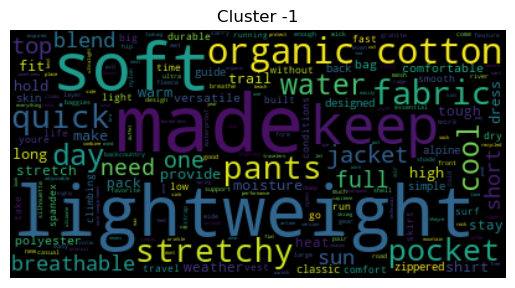

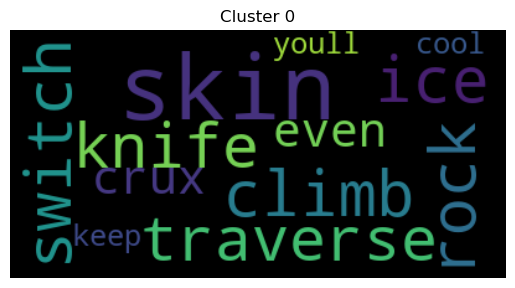

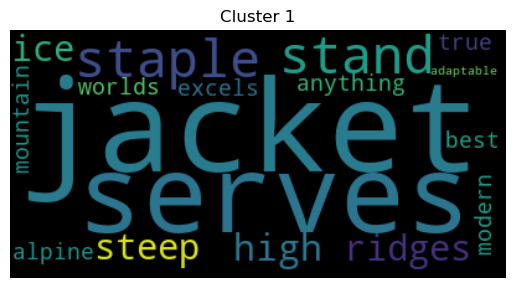

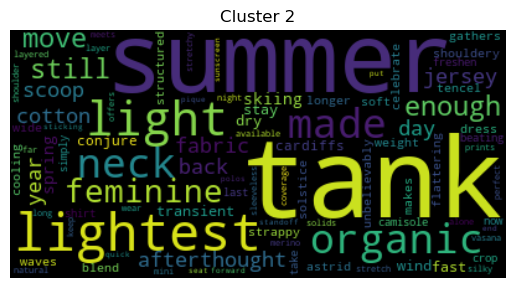

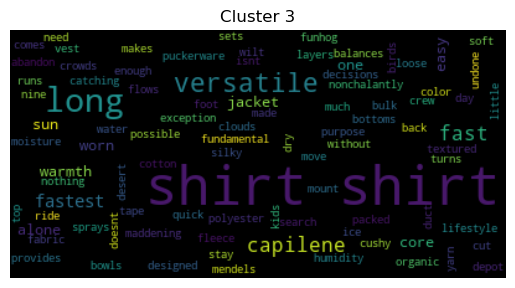

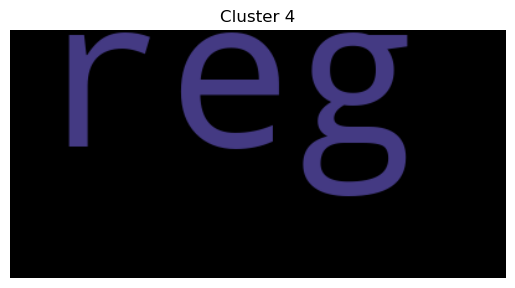

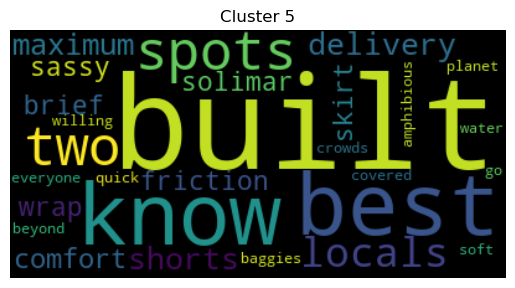

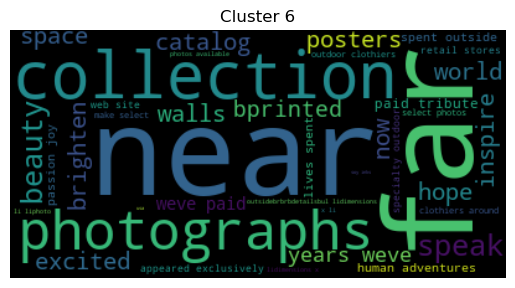

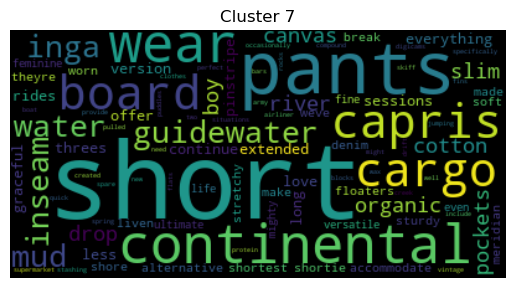

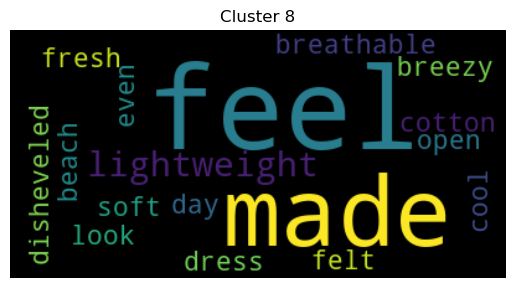

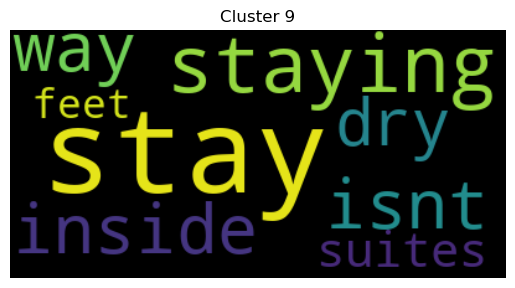

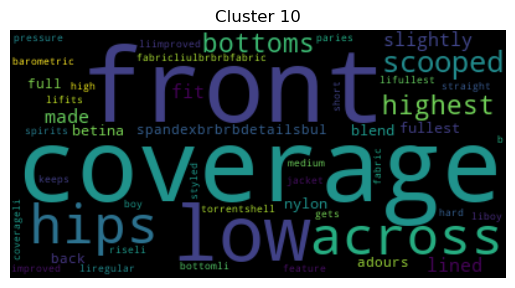

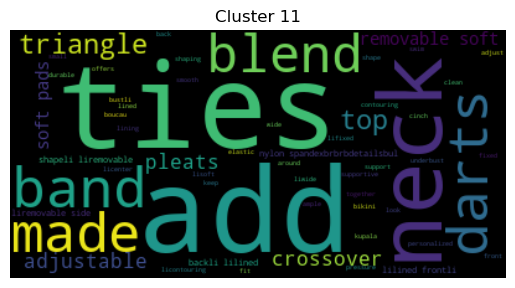

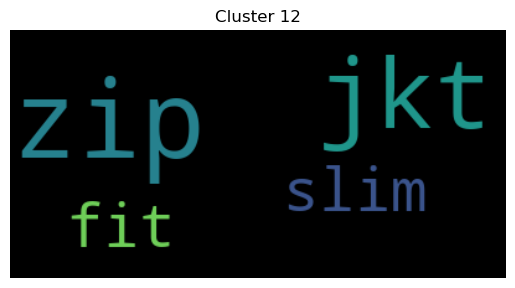

In [28]:
# Group descriptions by cluster
grouped = df.groupby(db.labels_)

# Create and display a wordcloud for each cluster
for label, group in grouped:
    cluster_text = ' '.join(group['description_clean'])
    wordcloud = WordCloud().generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Cluster {}'.format(label))
    plt.axis('off')
    plt.show()

## Part 2 - Recommender system

Then, you can use the cluster ids from part 1 to build a **recommender system**. The aim is to be able to suggest to a user some products that are similar to the ones he is interested in. To do this, we will consider that products belonging to the same cluster are similar.

- Create a function named `find_similar_items` that takes an argument `item_id` representing the id of a product, and that returns a list of 5 item ids that belong to the same cluster as the product passed in argument
- Use python's `input()` function to allow the user to choose a product and perform some suggestions of similar items

    This function suggests to a user some products that are similar to the ones he is interested in.
    It creates a list of 5 documents present in the same cluster as the one the user has selected.
    
    arguments:

    item_id : id of the product the user has **selected**

In [29]:
print(df['type_clean'][0])

active classic boxers 


In [43]:
def find_similar_items(item_id):
    '''
    This function suggests to a user some products that are similar to the ones he is interested in.
    It creates a list of 5 documents present in the same cluster as the one the user has selected.
    
    arguments:

    item_id : id of the product the user has selected

    '''
    
    # Extract product title selected by user 'type_clean" use ID to access corresponding value
    product_select = df['type_clean'][item_id]

    # Extract cluster number of selected product Dense_X_frame use ID to acces corresponding value
    label_product = dense_X_frame['cluster'][item_id]

    # Select all product that have the same cluster number than the product selected
    mask =  dense_X_frame['cluster'] == label_product

    # idxs will contain all similar product 
    idxs = dense_X_frame.loc[mask, :].index

    # Because idxs are list of strings (ex ['doc_2', 'doc_3', 'doc_6', 'doc_9', 'doc_10']), 
    # In order to select similar product in 'product_title' of data dataframe where id are integer 
    # We need to remove 'doc_' and cast str number into ingeter
    idxs = [int(i[4:]) for i in idxs]

    recommended_list = list(df['type_clean'].loc[idxs[0:5]].values)

    return f'Because you choose the product : {product_select}, you can be interested by these products : {recommended_list}'


In [31]:
find_similar_items(int(input('Please select a product id')))

"Because you choose the product : ascensionist jkt , you can be interested by these products : ['active sport boxer briefs ', 'active sport briefs ', 'alpine guide pants ', 'atom ', 'print banded betina btm ']"

## Part 3 : Topic modeling

*Cette partie est indépendante des deux autres.*

L'objectif est d'utiliser un modèle LSA pour extraire automatiquement les sujets latents dans les descriptions des produits.

- Utilisez TruncatedSVD pour effectuer une extraction de sujet à partir de la matrice TF-IDF. Vous pouvez essayer des valeurs pour `n_components` qui permettent d'obtenir 10 à 20 sujets. Enregistrez la matrice encodée dans une variable nommée `topic_encoded_df`.
- Contrairement au clustering, LSA permet de mapper chaque document sur un mélange de plusieurs sujets. Pour cette raison, il est un peu plus difficile d'interpréter les sujets comme des catégories : un document peut en fait être lié à plusieurs sujets à la fois. Pour faciliter les choses, pensez à extraire le sujet principal de chaque document.
- Comme dans la partie 1, vous pouvez afficher des `wordclouds` pour analyser les résultats.

In [32]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(df['nlp_ready'])
X

<500x1775 sparse matrix of type '<class 'numpy.float64'>'
	with 4549 stored elements in Compressed Sparse Row format>

In [33]:
dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
dense.shape

(500, 1775)

In [35]:
print(f'We can noticed than we have {dense.shape[0]} documents and {dense.shape[1]} words in the vocabulary.')

We can noticed than we have 500 documents and 1775 words in the vocabulary.


In [36]:
# Display the vocabulary and his column position
vectorizer.vocabulary_

{'reason': 1191,
 'boxer': 176,
 'cult': 382,
 'favorite': 547,
 'skin': 1370,
 'glory': 644,
 'require': 1218,
 'movement': 979,
 'decide': 405,
 'poach': 1114,
 'route': 1257,
 'form': 595,
 'superbreathable': 1503,
 'climb': 282,
 'ice': 737,
 'switch': 1527,
 'rock': 1249,
 'traverse': 1606,
 'knife': 809,
 'high': 702,
 'ridge': 1237,
 'steep': 1452,
 'alpine': 43,
 'jacket': 781,
 'serve': 1315,
 'true': 1620,
 'good': 647,
 'world': 1760,
 'staple': 1443,
 'excel': 518,
 'stand': 1440,
 'technical': 1542,
 'soft': 1404,
 'shell': 1328,
 'multitasker': 982,
 'cloud': 291,
 'atom': 75,
 'play': 1108,
 'courier': 355,
 'bag': 90,
 'daypack': 402,
 'carry': 236,
 'coverage': 358,
 'betina': 125,
 'fit': 568,
 'hip': 710,
 'slightly': 1381,
 'scoop': 1286,
 'lined': 865,
 'blend': 140,
 'nylon': 1013,
 'spandexbrbrbdetailsbul': 1417,
 'lifullest': 850,
 'bottomli': 166,
 'lifit': 847,
 'coverageli': 359,
 'liregular': 872,
 'riseli': 1244,
 'liimprove': 856,
 'fabricliulbrbrbfabric':

In [37]:
# SVD represent documents and terms in vectors (Singular Value Decomposition)
svd_model = TruncatedSVD(n_components=13)   # dimensionality reduction 13 components
lsa = svd_model.fit_transform(X) 

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_{}".format(i+1) for i in range(13)], index = df.index)
topic_encoded_df["text"] = df['nlp_ready'].values
topic_encoded_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,text
0,1.910166e-04,2.360487e-03,0.000789,0.000007,0.012707,-0.013238,-0.019584,-0.011539,-0.011011,-0.022746,-0.016556,-0.012919,-0.018556,reason boxer cult favorite
1,1.338123e-04,6.743314e-03,0.004892,-0.000018,0.031602,-0.035334,-0.057504,-0.020157,-0.028017,0.008761,-0.066531,-0.084883,-0.093268,skin glory require movement boxer decide poach...
2,-9.231683e-12,2.618687e-07,-0.000001,-0.000003,0.000037,-0.000007,0.000029,-0.000318,0.000033,0.000180,0.000576,0.000187,0.000354,superbreathable
3,1.380643e-04,1.528917e-02,0.001687,-0.000047,0.110111,-0.070606,-0.078103,-0.112317,-0.116635,0.238490,-0.229506,-0.288563,-0.166283,skin climb ice switch rock traverse knife
4,8.241271e-04,2.446539e-02,0.004390,-0.000138,0.157991,-0.072785,-0.096837,-0.204201,-0.169290,0.414383,-0.040512,0.171866,0.070581,high ridge steep ice alpine jacket serve true ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.175139e-05,2.273303e-02,0.008347,-0.000088,0.049617,-0.067036,-0.083799,0.039484,0.027718,0.037258,0.286041,-0.069216,-0.107130,cut loose madden crowd search undone capilene ...
496,1.886968e-04,2.643097e-02,0.008215,0.000064,0.081647,-0.101769,-0.109682,0.040118,0.025552,0.092570,0.252908,-0.082249,-0.085454,crew take edge fickle weather clearing conditi...
497,3.659123e-04,1.199627e-02,0.012402,0.000360,0.030718,-0.032676,-0.045354,-0.078026,-0.029562,-0.029197,0.100656,-0.001529,-0.154793,time shell
498,3.502908e-04,2.336079e-01,0.468195,-0.000014,-0.034497,0.041538,-0.021297,0.002317,-0.004285,0.022333,0.040882,0.006977,-0.044274,wear cargo short


In [44]:
# Assign each document to the topic it is the most linked:
topic_encoded_df["class_pred"] = [np.argmax(topic) for topic in lsa]
topic_encoded_df["class_pred"].value_counts()


4     124
0      99
10     57
11     50
9      35
12     32
1      29
2      27
6      16
7      14
8       9
3       8
Name: class_pred, dtype: int64

In [39]:
topic_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,text,class_pred
0,1.910166e-04,2.360487e-03,0.000789,0.000007,0.012707,-0.013238,-0.019584,-0.011539,-0.011011,-0.022746,-0.016556,-0.012919,-0.018556,reason boxer cult favorite,4
1,1.338123e-04,6.743314e-03,0.004892,-0.000018,0.031602,-0.035334,-0.057504,-0.020157,-0.028017,0.008761,-0.066531,-0.084883,-0.093268,skin glory require movement boxer decide poach...,4
2,-9.231683e-12,2.618687e-07,-0.000001,-0.000003,0.000037,-0.000007,0.000029,-0.000318,0.000033,0.000180,0.000576,0.000187,0.000354,superbreathable,10
3,1.380643e-04,1.528917e-02,0.001687,-0.000047,0.110111,-0.070606,-0.078103,-0.112317,-0.116635,0.238490,-0.229506,-0.288563,-0.166283,skin climb ice switch rock traverse knife,9
4,8.241271e-04,2.446539e-02,0.004390,-0.000138,0.157991,-0.072785,-0.096837,-0.204201,-0.169290,0.414383,-0.040512,0.171866,0.070581,high ridge steep ice alpine jacket serve true ...,9


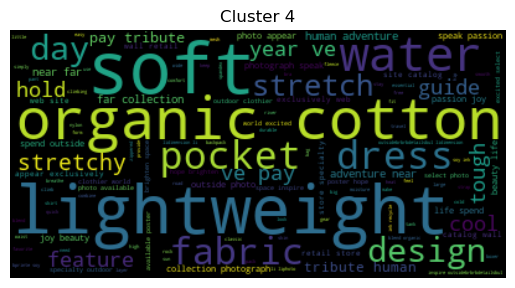

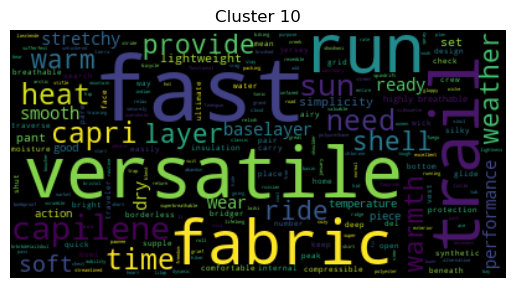

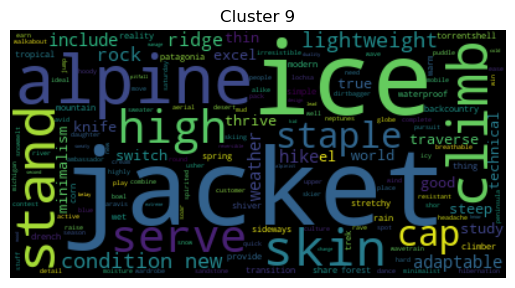

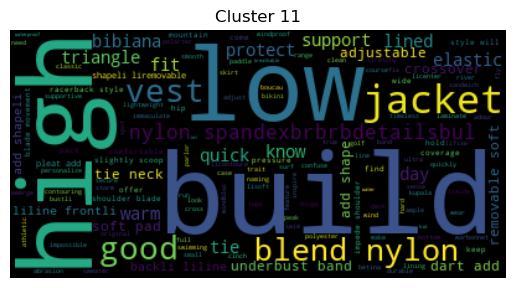

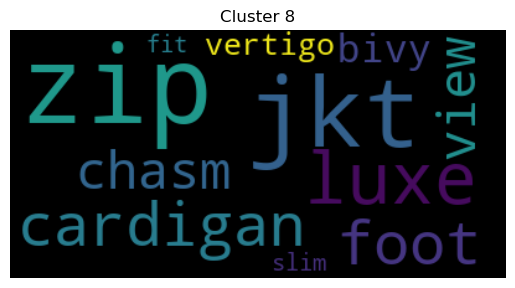

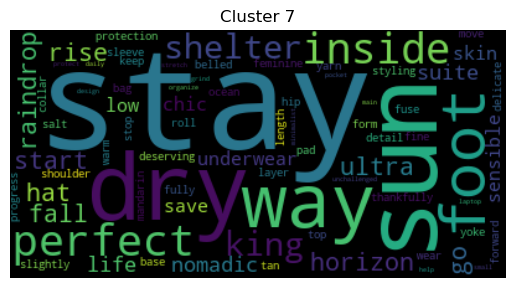

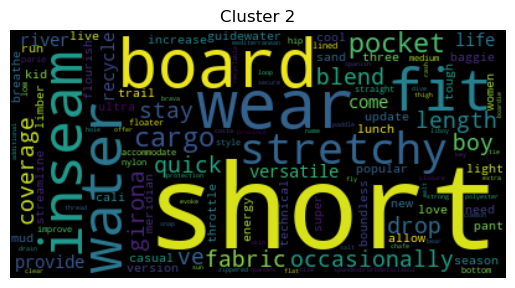

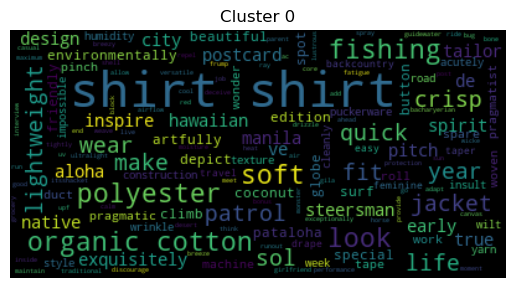

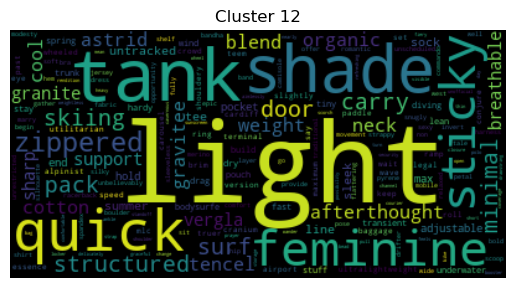

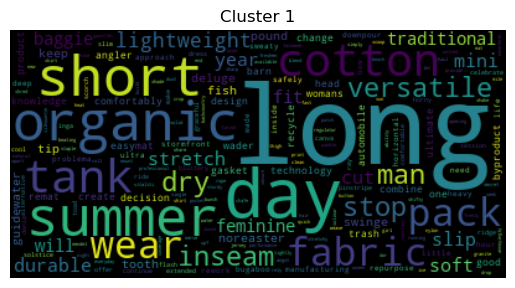

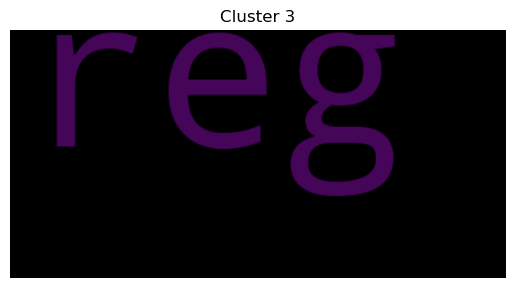

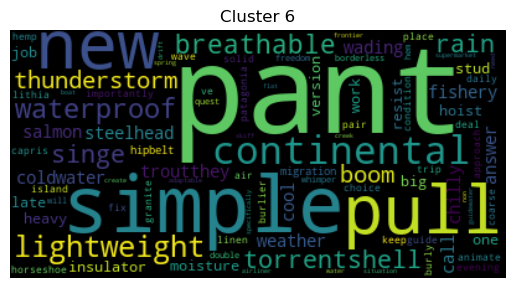

In [40]:
# Create a dictionary to store data per cluster
cluster_data = {}

# Browse the DataFrame to collect data by cluster
for index, row in topic_encoded_df.iterrows():
    cluster = row['class_pred']
    text = row['text']
    
    if cluster in cluster_data:
        cluster_data[cluster] += ' ' + text
    else:
        cluster_data[cluster] = text

# Create and display of a word cloud for each cluster
for cluster, text in cluster_data.items():
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster}")
    plt.axis("off")
    plt.show()

# Compare results

In [41]:
# DBSCAN 
# le nombre de valeurs par cluster
labels = db.labels_ # stock label for each word
unique_labels, counts = np.unique(labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    if label == -1:
        # -1 represents the noise points (outliers)
        print("Outlier number :", count)
    else:
        print("Number of points (description) in the cluster", label, ":", count)

Outlier number : 303
Number of points (description) in the cluster 0 : 5
Number of points (description) in the cluster 1 : 4
Number of points (description) in the cluster 2 : 15
Number of points (description) in the cluster 3 : 95
Number of points (description) in the cluster 4 : 8
Number of points (description) in the cluster 5 : 7
Number of points (description) in the cluster 6 : 8
Number of points (description) in the cluster 7 : 30
Number of points (description) in the cluster 8 : 4
Number of points (description) in the cluster 9 : 5
Number of points (description) in the cluster 10 : 7
Number of points (description) in the cluster 11 : 4
Number of points (description) in the cluster 12 : 5


In [42]:
lsa_cluster_counts = topic_encoded_df["class_pred"].value_counts().sort_index()
lsa_cluster_counts

0      99
1      29
2      27
3       8
4     124
6      16
7      14
8       9
9      35
10     57
11     50
12     32
Name: class_pred, dtype: int64

### In conclusion, the topics discovered by LSA are significantly distinct from the intended target. In particular, theme 0 appears frequently in the documents and groups a wide range of target categories. LSA is a useful tool for discovering structural patterns in a corpus of texts. However, the themes it generates often diverge considerably from the categories that would be identified by a human being.

### It is important to remember that, unlike supervised classification and unsupervised clustering, LSA assumes that a document can be associated with several themes. This complexity complicates the interpretation of the model's results, but makes it possible to create more realistic thematic models, as real-life documents often relate to different topics.